In [1]:
from keras.preprocessing import image
import pytesseract
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


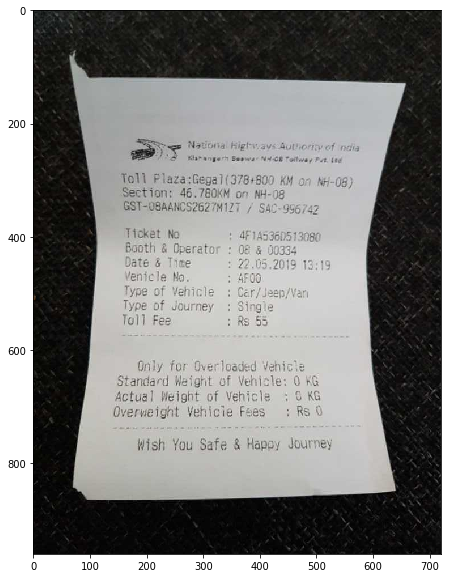

In [2]:
image = cv.imread("/home/nobel/my_models_ML/OCR_PYTESSERACT/Receipts/0a8a955f.jpeg")
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(image)

(960, 720)
(1080, 1440)


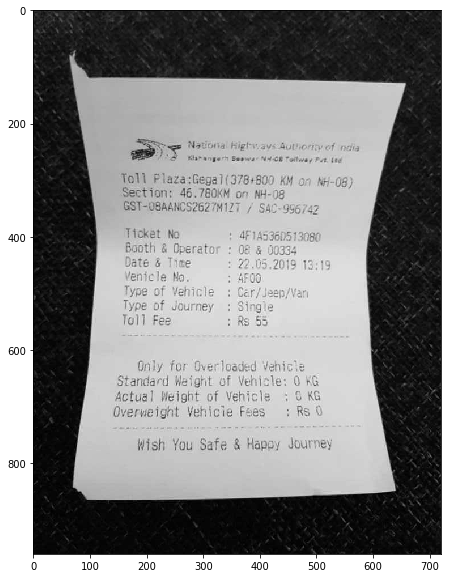

In [3]:
image = cv.imread("/home/nobel/my_models_ML/OCR_PYTESSERACT/Receipts/0a8a955f.jpeg",0)
plt.figure(figsize=(20,10))

plt.imshow(image,cmap="gray")
print(image.shape)
image=cv.resize(image,(image.shape[0]*150//100,image.shape[1]*150//100))
print(image.shape)

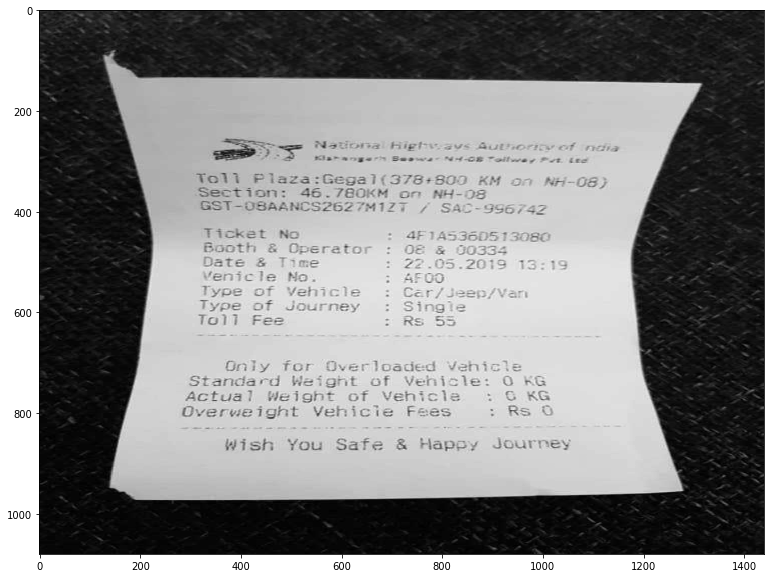

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(image,cmap="gray")

In [5]:

ret,thresh1 = cv.threshold(image,int(255*75)//100,255,cv.THRESH_BINARY)

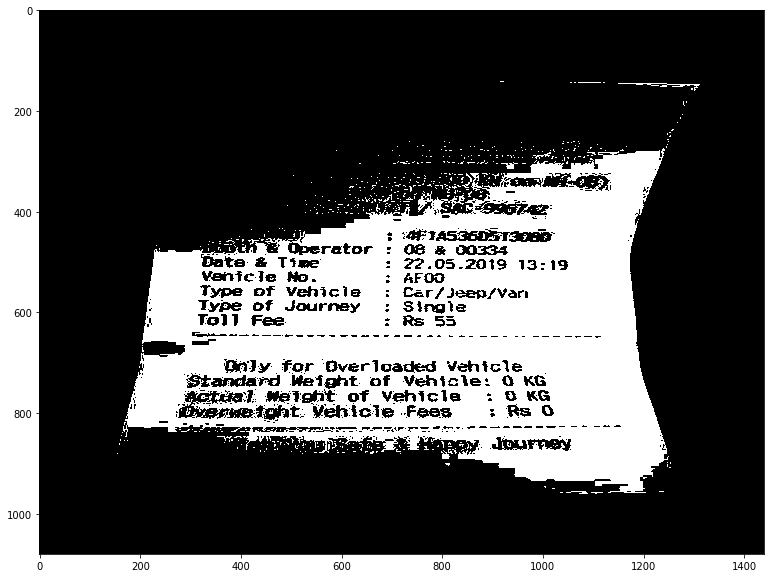

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(thresh1,cmap="gray")

In [7]:
text=pytesseract.image_to_string(thresh1)

In [8]:
print(text)

091mm
08 -& 00334
22.05.2019 13:19
AFOO
Car/Jeep/Van
Slm'le

Toll Fee Rs 55

m.__.___..--__-___------ --- --_

Type of Vehicle
Type of Journey

u u n u u u g.

10!“;
:R80


In [9]:
import re

In [10]:
date_str=re.search("([0-9]{1,2}\.[0-9]{1,2}\.[0-9]{1,4})",text,)

In [11]:
date_str.group(0)

'22.05.2019'

In [12]:
th3 = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,29,11)

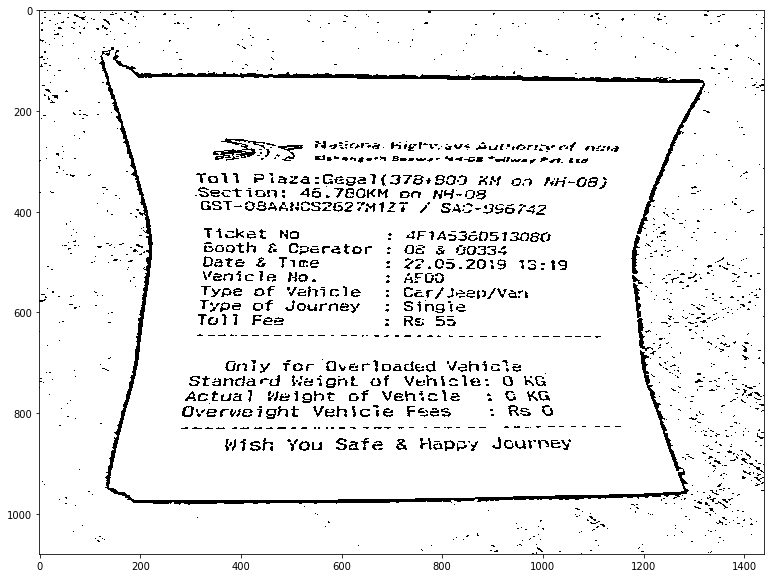

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(th3,cmap="gray")

In [14]:
print(pytesseract.image_to_string(th3))

_ »? .‘Jaﬁonau HiEI-v. aVé Aux Hoary n! nara
‘33:?) :4: n.-.~..r~ ecu—u- ~41“: .alluvnf ’4 us
T011 Piaza:Gega1(378¢500 KM an HH-UB)

.Section: 46.780KM on HH-OB
GST—DBAAHCS2627MIZT / SAC-996742

Ticket No
Booth 8 Operator
Date & T1me

4F1A5350513080
08 S 3033:.
22.05.2029 13:!9

u u n u n u ..

Venicle Ho. AFOO

Tyne of Vehicle Car/Jeep/Van
Type of Journey Single

T011 Fee Rs 55

 

Oniy for Overloaded Vehicﬁe 7
Standard Height of Vehicle: 0 KB
Actual Weight of Vehfcle - C
Overweight Vehicie Fees


In [82]:
t="33:?) :4: n.-.~..r~ ecu—u- ~41: .alluvnf  usT011 Piaza:Gega1(378¢500 KM an HH-UB.Section: 46.780KM on HH-OB\GST—DBAAHCS2627MIZT / SAC-99674\Ticket N\Booth 8 Operator\Date & T1me 4F1A5350513080\ 08 S 3033:.\ 22.05.2029 13:!9\Venicle Ho. AFOO\Tyne of Vehicle Car/Jeep/Van\Type of Journey Single\T011 Fee Rs 5/05/20 Oniy for Overloaded Vehicﬁe 7\ Standard Height of Vehicle: 0 KB\Actual Weight of Vehfcle - C\Overweight Vehicie Fees"

In [83]:
print(t)

33:?) :4: n.-.~..r~ ecu—u- ~41: .alluvnf  usT011 Piaza:Gega1(378¢500 KM an HH-UB.Section: 46.780KM on HH-OB\GST—DBAAHCS2627MIZT / SAC-99674\Ticket N\Booth 8 Operator\Date & T1me 4F1A5350513080\ 08 S 3033:.\ 22.05.2029 13:!9\Venicle Ho. AFOO\Tyne of Vehicle Car/Jeep/Van\Type of Journey Single\T011 Fee Rs 5/05/20 Oniy for Overloaded Vehicﬁe 7\ Standard Height of Vehicle: 0 KB\Actual Weight of Vehfcle - C\Overweight Vehicie Fees


In [84]:
import re
pattern="([0-9]{1,2}\/[0-9]{2}\/[0-9]{2,4})|([0-9]{1,2}\.[0-9]{2}\.[0-9]{2,4})"

In [85]:
l=re.findall(pattern,t,)

In [86]:
print(l)

[('', '22.05.2029'), ('5/05/20', '')]


In [87]:
d=[[x for x in y if len(x)!=0] for y in l]

In [97]:
d

[['22.05.2029'], ['5/05/20']]

In [89]:
for i in d:
    print(str(i[0]))

22.05.2029
5/05/20


In [108]:
pred_lis=[]
if len(d)!=0:
    for i in range(len(d)):
        pred_lis.append(str(d[i][0]))

In [109]:
pred_lis

['22.05.2029', '5/05/20']

In [107]:
d[0][0]

'22.05.2029'